<a href="https://colab.research.google.com/github/caiogomide/imersao-dados-2021/blob/main/notebooks/aula-5/aula_5_conteudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 05 - Machine Learning, Sci-kit learning e desafios envolvidos**

#### 5.1  Importação de Biblioteca e Base de Dados

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Configuração do seaborn
sns.set()

In [25]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

In [26]:
dados = pd.read_csv(url_dados, compression='zip')

In [27]:
# Renomeação das colunas de expressões gênicas e viabilidade celular, retirando os hifens
dados.columns = dados.columns.str.replace('-','')
# Renomeação da coluna droga para composto
dados.rename(columns={'droga':'composto'}, inplace=True)

In [28]:
url_resultados = 'https://raw.githubusercontent.com/alura-cursos/imersaodados3/main/dados/dados_resultados.csv'

In [29]:
# Importação de base de dados com resultados dos experimentos
resultados = pd.read_csv(url_resultados)

In [30]:
#Cria uma series indicando quantos mecanismos foram ativados em cada experimento
ativacao_por_experimento = resultados.sum(axis=1, skipna=True)

#Cria uma coluna indicando o número de mecanismos ativados por um experimento 
resultados['mecanismos_ativados'] = ativacao_por_experimento

#Cria uma coluna indicando se o experimento em questão ativou algum mecanismo de ação ou não (True or False)
resultados['ativo'] = resultados['mecanismos_ativados'] != 0

# Merge de dados dos experimentos com os resultados, para isso foram selecionadas da coluna de resultados
# apenas os mecanismos ativados e se o determinado experimento foi ativo ou não, merge baseado no id dos experimentos
dados_com_resultados = pd.merge(dados, resultados[['id', 'mecanismos_ativados', 'ativo']],on='id')

#### 5.2 Configuração do Modelo de Regressão Logística


In [31]:
# Importação do modelo que será utilizado: Regressão Logística
from sklearn.linear_model import LogisticRegression

In [32]:
# Importação do método responsável por dividir dados de treino e teste 
from sklearn.model_selection import train_test_split

In [33]:
# Importação do método responsável por calcular acurácia dos modelos
from sklearn.metrics import accuracy_score

In [34]:
# Instanciação do modelo de regressão que será utilizado
modelo_regressao_logistica = LogisticRegression(max_iter=1000)

In [35]:
# Determinacão das variáveis necessárias para criação do modelo de regressão

# Seleção de valores de expressão gênica e viabilidade celular para configuração de entrada (valores da assinatura celular)
x = dados_com_resultados.select_dtypes('float64')
# Seleção dos valores da coluna ativa para configuração de saída (valores que serão previstos)
y = dados_com_resultados['ativo']

In [36]:
# Divisão entre dados de treino e teste para as variáveis x e y
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=404)

#### 5.3 Treinamento do Modelo de Regressão Logística e Comparação com Modelo Dummy

###### Treinamento Modelo de Regressão Logística

In [37]:
# Treinamento do modelo de regressão, utilizando valores de entrada e saída
# A função do modelo é receber os valores da assinatura celular(x) e prever se esta assinatura irá ativar algum mecanismo de ação(y) ou não
modelo_regressao_logistica.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Previsão do modelo de regressão logística
previsao_modelo_regressao_logistica = modelo_regressao_logistica.predict(x_teste)

In [39]:
# Calculo de acurácia do modelo de regressão logística
accuracy_score(y_teste, previsao_modelo_regressao_logistica)

0.6304849884526559

**Conclusão:** o modelo de regressão logística apresentou uma acurácia de 63%, este valor deverá ser comparado com outros modelos para verificar sua eficácia real.

######Treinamento Modelo Dummy

In [40]:
# Importação do modelo dummy
from sklearn.dummy import DummyClassifier

In [41]:
# Instanciação do modelo dummy que será utilizado, o qual irá predizer baseado na classificação mais frequente
modelo_dummy = DummyClassifier(strategy='most_frequent')

In [42]:
# Treinamento do modelo dummy
modelo_dummy.fit(x_treino, y_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [43]:
# Previsão do modelo dummy
previsao_dummy = modelo_dummy.predict(x_teste)

In [44]:
# Calculo de acurácia do modelo dummy
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

**Resultados:**
* O modelo de regressão logística proposto acertou se o mecanismo de ação foi ativado ou não **63.04%** das vezes 
* O modelo *dummy*, baseado em prever o dado mais frequente para todos os casos, acertou **60.67%** das vezes

**Conclusão:** O modelo de regressão logística não é útil para o caso observado, pois a diferença entre este e um modelo ingênuo, baseado na escolha dos resultados mais frequentes, foi de apenas **2.36%**

####5.4 Configuração do Modelo de Árvore de Decisão

In [45]:
# Importação de modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Instanciação do modelo de árvore de decisão
modelo_arvore_decisao = DecisionTreeClassifier(max_depth=1)

In [47]:
# Treinamento do modelo de árvore de decisão
modelo_arvore_decisao.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
# Previsão do modelo de árvore de decisão
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [49]:
# Cálculo de acurácia do modelo de árvore de decisão
accuracy_score(y_teste, previsao_arvore_decisao)

0.6067604450976275

**Conclusão:** o modelo de arvore de decisão apresentou uma acurácia de 60.67%, que também não é o suficiente para o problema tratado.

#### 5.5 O Problema do OverFit

In [50]:
# Testando os valores diferentes de acurácia por níveis de árvore de decisão, para dados de treino e dados de teste
# Instanciação de listas que vão guardar os scores da acurácia com os dados de treino e teste
treino = []
teste = []
for i in range(1,15):
    modelo_arvore_decisao = DecisionTreeClassifier(max_depth=i)
    modelo_arvore_decisao.fit(x_treino,y_treino)
    teste.append(modelo_arvore_decisao.score(x_teste, y_teste))
    treino.append(modelo_arvore_decisao.score(x_treino, y_treino))

In [51]:
# Análise gráfica simples do comportamento do score de teste e treino, de profundidade 1 a profundidade 15

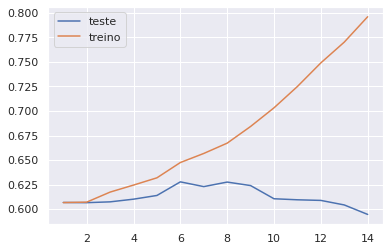

In [52]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')

**Conclusão:** neste processo, ao aumentar a profundidade da arvore de decisão, ocorreu o que é chamado de overfit, a árvore de decisão com mais profundidade acertou frequentemente o dado de treino, porém ao ser mostrado novos dados, os de teste, a performance caiu consideravelmente.

#### 5.6 Configuração do Modelo Random Forest

In [53]:
# Importação da biblioteca responsável pelo modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Seleção de valores de expressão gênica, viabilidade celular, tempo, dose e composto 
# para configuração de entrada (valores da assinatura celular)

x = dados_com_resultados.drop(['id', 'mecanismos_ativados', 'ativo', 'composto'], axis=1)

# Transformação de colunas tratamento, dose e tempo em colunas categóricas numeradas
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])


In [55]:
# Seleção dos valores da coluna ativa para configuração de saída (valores que serão previstos)
y = dados_com_resultados['ativo']

In [56]:
# Divisão entre dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=404)

In [57]:
# Instanciação do modelo random forest
modelo_random_forest = RandomForestClassifier()

In [58]:
# Treinamento do modelo random forest
modelo_random_forest.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
# Previsão do modelo random forest
previsao_random_forest = modelo_random_forest.predict(x_teste)

In [60]:
# Cálculo de acurácia do modelo random forest
accuracy_score(y_teste, previsao_random_forest)

0.6878018055847155

**Conclusão:** dentre os modelos estudados até agora o random forest foi o que apresentou melhor desempenho: 68.78%, porém esta porcentagem de acerto ainda não é o suficiente para o problema apresentado, outros modelos devem ser testados.